In [1]:
import pandas as pd


In [2]:
dataset = pd.read_csv('C:\\Users\\Notebook\\Documents\\Base de dados\municipio-pibs.csv')


In [3]:
dataset.columns

Index(['id_municipio', 'ano', 'PIB', 'impostos_liquidos', 'VA',
       'VA_agropecuaria', 'VA_industria', 'VA_servicos', 'VA_ADESPSS'],
      dtype='object')

In [4]:
dataset.describe()

,id_municipio,ano,PIB,impostos_liquidos,VA,VA_agropecuaria,VA_industria,VA_servicos,VA_ADESPSS
count,9.461600e+04,94616.000000,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04
mean,3.253181e+06,2010.003002,7.287343e+08,1.052315e+08,6.235028e+08,3.313567e+07,1.531836e+08,3.329723e+08,1.042113e+08
std,9.844558e+05,4.898931,8.059832e+09,1.489081e+09,6.596790e+09,6.356696e+07,1.094854e+09,4.885391e+09,1.058767e+09
min,1.100015e+06,2002.000000,-1.904643e+07,-1.508840e+07,-5.105931e+08,-2.298910e+06,-2.897193e+09,3.722780e+05,1.446664e+06
25%,2.512101e+06,2006.000000,3.905784e+07,1.478442e+06,3.729948e+07,6.121093e+06,1.904200e+06,8.765398e+06,1.286555e+07
50%,3.146255e+06,2010.000000,8.971593e+07,4.477020e+06,8.467848e+07,1.519649e+07,6.322138e+06,2.362657e+07,2.568912e+07
75%,4.119103e+06,2014.000000,2.555032e+08,1.811785e+07,2.356625e+08,3.532677e+07,3.520165e+07,8.064128e+07,5.908990e+07
max,5.300108e+06,2018.000000,7.146834e+11,1.271543e+11,5.875291e+11,2.482540e+09,6.689305e+10,4.854288e+11,1.017928e+11


In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
dataset.tail()

,id_municipio,ano,PIB,impostos_liquidos,VA,VA_agropecuaria,VA_industria,VA_servicos,VA_ADESPSS
94611,5300108,2014,197432058527,26230292508,171201766020,770067554,11346921785,85358920839,73725855841
94612,5300108,2015,215612862838,29318811520,186294051318,626694085,9996983948,92375778698,83294594587
94613,5300108,2016,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
94614,5300108,2017,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
94615,5300108,2018,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454


In [7]:
dataset.impostos_liquidos.sum()

9956580205682

In [8]:
dataset_uf = pd.read_excel('C:\\Users\\Notebook\\Documents\\Base de dados\\Relatorio_mun\\RELATORIO_DTB_BRASIL_MUNICIPIO.xls')

In [9]:
dataset_uf.columns = ['UF', 'Nome_UF', 'Região Geográfica Intermediária',
       'Nome Região Geográfica Intermediária', 'Região Geográfica Imediata',
       'Nome Região Geográfica Imediata', 'Mesorregião Geográfica',
       'Nome_Mesorregião', 'Microrregião Geográfica', 'Nome_Microrregião',
       'Município', 'id_municipio', 'Nome_Município']


In [10]:
dataset_uf.columns

Index(['UF', 'Nome_UF', 'Região Geográfica Intermediária',
       'Nome Região Geográfica Intermediária', 'Região Geográfica Imediata',
       'Nome Região Geográfica Imediata', 'Mesorregião Geográfica',
       'Nome_Mesorregião', 'Microrregião Geográfica', 'Nome_Microrregião',
       'Município', 'id_municipio', 'Nome_Município'],
      dtype='object')

In [11]:
query = pd.merge(dataset[['id_municipio', 'ano', 'PIB', 'impostos_liquidos', 
                          'VA','VA_agropecuaria', 'VA_industria', 'VA_servicos', 'VA_ADESPSS']],
                 dataset_uf[['Nome_UF','Nome_Município','id_municipio']],
                 on='id_municipio',
                 how='left')

In [19]:
query.to_excel('C:\\Users\\Notebook\\Documents\\Base de dados\\Relatorio_mun\\PIB.xlsx')

In [15]:
query.isnull().sum()

id_municipio         0
ano                  0
PIB                  0
impostos_liquidos    0
VA                   0
VA_agropecuaria      0
VA_industria         0
VA_servicos          0
VA_ADESPSS           0
Nome_UF              0
Nome_Município       0
dtype: int64

In [16]:
query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94616 entries, 0 to 94615
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_municipio       94616 non-null  int64 
 1   ano                94616 non-null  int64 
 2   PIB                94616 non-null  int64 
 3   impostos_liquidos  94616 non-null  int64 
 4   VA                 94616 non-null  int64 
 5   VA_agropecuaria    94616 non-null  int64 
 6   VA_industria       94616 non-null  int64 
 7   VA_servicos        94616 non-null  int64 
 8   VA_ADESPSS         94616 non-null  int64 
 9   Nome_UF            94616 non-null  object
 10  Nome_Município     94616 non-null  object
dtypes: int64(9), object(2)
memory usage: 8.7+ MB


In [17]:
query.columns.tolist()

['id_municipio',
 'ano',
 'PIB',
 'impostos_liquidos',
 'VA',
 'VA_agropecuaria',
 'VA_industria',
 'VA_servicos',
 'VA_ADESPSS',
 'Nome_UF',
 'Nome_Município']

In [18]:
query.id_municipio = query.id_municipio.astype('int32')
query.ano = query.ano.astype('int32')
query.PIB = query.PIB.astype('int32')
query.impostos_liquidos = query.impostos_liquidos.astype('int32')
query.VA = query.VA.astype('int32')
query.VA_agropecuaria = query.VA.astype('int32')
query.VA_industria = query.VA_industria.astype('int32')
query.VA_servicos = query.VA_servicos.astype('int32')
query.VA_ADESPSS = query.VA_ADESPSS.astype('int32')

In [20]:
query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94616 entries, 0 to 94615
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_municipio       94616 non-null  int32 
 1   ano                94616 non-null  int32 
 2   PIB                94616 non-null  int32 
 3   impostos_liquidos  94616 non-null  int32 
 4   VA                 94616 non-null  int32 
 5   VA_agropecuaria    94616 non-null  int32 
 6   VA_industria       94616 non-null  int32 
 7   VA_servicos        94616 non-null  int32 
 8   VA_ADESPSS         94616 non-null  int32 
 9   Nome_UF            94616 non-null  object
 10  Nome_Município     94616 non-null  object
dtypes: int32(9), object(2)
memory usage: 5.4+ MB


In [40]:
 query['Nome_Município'].nunique() 

5297

In [21]:
mongagua = query.loc[query['Nome_Município'] == 'Mongaguá']
mongagua

,id_municipio,ano,PIB,impostos_liquidos,VA,VA_agropecuaria,VA_industria,VA_servicos,VA_ADESPSS,Nome_UF,Nome_Município
61434,3531100,2002,179568745,8730105,170838640,170838640,30819139,88283649,48300663,São Paulo,Mongaguá
61435,3531100,2003,190653891,10232109,180421781,180421781,26909063,95116860,55196156,São Paulo,Mongaguá
61436,3531100,2004,200858092,10468005,190390088,190390088,27744959,98710178,59382800,São Paulo,Mongaguá
61437,3531100,2005,242582452,12694602,229887850,229887850,35699972,118946428,71955556,São Paulo,Mongaguá
61438,3531100,2006,268208201,16200708,252007493,252007493,34407714,133261526,80286704,São Paulo,Mongaguá
61439,3531100,2007,296227912,17829758,278398154,278398154,35146589,146046232,93393920,São Paulo,Mongaguá
61440,3531100,2008,309989957,19303547,290686410,290686410,28561062,157289629,100705145,São Paulo,Mongaguá
61441,3531100,2009,400417432,24172074,376245358,376245358,57167600,196730655,117979240,São Paulo,Mongaguá
61442,3531100,2010,435874254,25364042,410510212,410510212,51196459,224233845,130027565,São Paulo,Mongaguá
61443,3531100,2011,496133527,29549704,466583823,466583823,55855085,257676958,148404791,São Paulo,Mongaguá


In [22]:
from matplotlib import pyplot as plt
import numpy as np

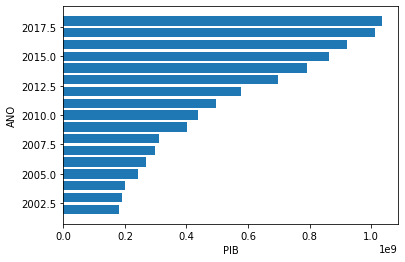

In [23]:
plt.barh(mongagua['ano'],mongagua['PIB'])
plt.xlabel('PIB')
plt.ylabel('ANO')
plt.show()

In [25]:
ano = query.groupby(query['ano']).sum()
ano.sort_values(by='PIB',ascending=False)

,id_municipio,PIB,impostos_liquidos,VA,VA_agropecuaria,VA_industria,VA_servicos,VA_ADESPSS
ano,,,,,,,,
2017,1.812250e+10,1.392864e+12,3.165525e+11,1.291059e+12,1.291059e+12,4.762455e+11,7.392285e+11,5.757732e+11
2018,1.812250e+10,1.369144e+12,2.929113e+11,1.321046e+12,1.321046e+12,5.315260e+11,7.401938e+11,5.987084e+11
2016,1.812250e+10,1.321526e+12,2.911603e+11,1.288063e+12,1.288063e+12,4.635252e+11,7.023386e+11,5.413941e+11
2015,1.812250e+10,1.241258e+12,2.775453e+11,1.195641e+12,1.195641e+12,4.478224e+11,6.426468e+11,5.119248e+11
2014,1.812250e+10,1.204813e+12,2.650529e+11,1.167393e+12,1.167393e+12,4.271798e+11,6.440928e+11,4.775056e+11
2013,1.812250e+10,1.174091e+12,2.538729e+11,1.139261e+12,1.139261e+12,4.057765e+11,5.974110e+11,4.455393e+11
2012,1.810324e+10,1.086728e+12,2.566445e+11,1.062012e+12,1.062012e+12,3.956671e+11,5.265136e+11,4.158778e+11
2011,1.810324e+10,1.073552e+12,2.307192e+11,1.066171e+12,1.066171e+12,3.667889e+11,4.825300e+11,3.876056e+11
2010,1.810324e+10,1.012514e+12,2.179348e+11,9.534929e+11,9.534929e+11,3.715821e+11,4.553645e+11,3.488664e+11


In [27]:
 query.describe()

,id_municipio,ano,PIB,impostos_liquidos,VA,VA_agropecuaria,VA_industria,VA_servicos,VA_ADESPSS
count,9.461600e+04,94616.000000,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04
mean,3.253181e+06,2010.003002,1.743414e+08,3.818502e+07,1.690214e+08,1.690214e+08,6.266861e+07,8.820966e+07,6.476416e+07
std,9.844558e+05,4.898931,4.380307e+08,2.054162e+08,4.214886e+08,4.214886e+08,2.673569e+08,3.132016e+08,1.856067e+08
min,1.100015e+06,2002.000000,-2.147179e+09,-2.146986e+09,-2.147220e+09,-2.147220e+09,-2.146931e+09,-2.146759e+09,-2.144305e+09
25%,2.512101e+06,2006.000000,3.490019e+07,1.444645e+06,3.377529e+07,3.377529e+07,1.813823e+06,8.221798e+06,1.273222e+07
50%,3.146255e+06,2010.000000,8.061838e+07,4.358674e+06,7.705117e+07,7.705117e+07,6.000948e+06,2.220977e+07,2.541205e+07
75%,4.119103e+06,2014.000000,2.156476e+08,1.738844e+07,2.035163e+08,2.035163e+08,3.192304e+07,7.335443e+07,5.826329e+07
max,5.300108e+06,2018.000000,2.146752e+09,2.143758e+09,2.147465e+09,2.147465e+09,2.145163e+09,2.147146e+09,2.146873e+09
